In [1]:
import numpy as np

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
iris_X = iris.data
iris_Y = iris.target

In [5]:
np.unique(iris_Y)

array([0, 1, 2])

In [6]:
#split iris data in train and test data

In [7]:
#A random permutation, to split the data randomly
np.random.seed(0)

In [8]:
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_Y_train = iris_Y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_Y_test = iris_Y[indices[-10:]]

In [9]:
#Create and fit a k-nearest-neighbor classsifer

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
#evaluate model on test instances and compute test error
from sklearn.metrics import accuracy_score
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [12]:
iris_Y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [13]:
accuracy_score(iris_Y_test, knn.predict(iris_X_test))

0.90000000000000002

In [14]:
accuracy = accuracy_score(iris_Y_test, knn.predict(iris_X_test))

In [15]:
error = 1 - accuracy
print (error)

0.1


In [16]:
from sklearn.cross_validation import cross_val_score

/home/omcscn/DK/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
cs_scores = cross_val_score(knn, iris_X, iris_Y, scoring='accuracy')
print(cs_scores)
knn_cvs = cs_scores.mean()
print(knn_cvs)
evaluation_results = []
evaluation_results.append(knn_cvs)

[ 0.98039216  0.98039216  1.        ]
0.986928104575


In [18]:
#optimal k for knn:
k_range = range(1,50)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, iris_X, iris_Y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.94666666666666666, 0.94000000000000006, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.9333333333

/home/omcscn/DK/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/omcscn/DK/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


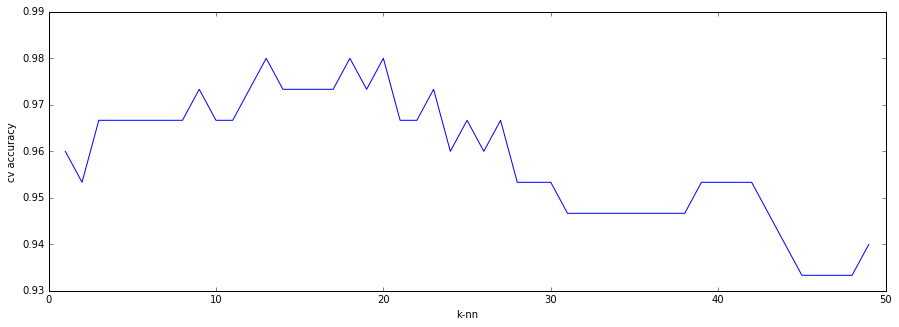

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
#plotting k's of knn to cv accuracy
plt.figure(figsize=(15,5))
plt.plot(k_range, k_scores)
plt.xlabel('k-nn')
plt.ylabel('cv accuracy')

In [20]:
'''as we can see from the scores as well as in the graph, there are several k values,
so which one to choose? it is recommended to choose the biggest one, because it is the one 
which produces the simplest model
'''
best_score = max(k_scores)
#get the indexes from the list k-score where we have the best performance 
#we should make sure to add 1 (liste starts from 0)
best_ks =[i+1 for i,x in enumerate(k_scores) if x == best_score]
print(best_ks)
optimal_k = max(best_ks)
print("optimal k :",optimal_k) 

[13, 18, 20]
optimal k : 20
